## Секция Импорта библиотек



In [1]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     # MNIST dataset 
from tensorflow.keras.models import Sequential  # Model Нейронной сети

from tensorflow.keras.layers import Dense, Dropout, Activation # Функции Активации и Слои нейронной сети
from keras.utils import np_utils                      

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.applications import InceptionV3

### Обучить перодвинутую архитектуру с 0 будет очень трудно, так как она имеет большое кол-во параметров.

Давайте попробуем использовать уже обученные нейронные сети для классификации произвольных картинок

In [4]:
# Импорт бибилиотек
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io


def predict_image(model_name, image_source):
  
  # Будем использовать этот словарь для выбора модели
  MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, 
    "resnet": ResNet50
  }
# Определяем входной размер
  input_shape = (224, 224)

  preprocess = imagenet_utils.preprocess_input
  if model_name in ("inception", "xception"):
    input_shape = (299, 299)
    preprocess = preprocess_input

  print("[INFO] loading {}...".format(model_name))
  
  Network = MODELS[model_name]
  model = Network(weights="imagenet") #Мы будем использовать уже обученную нейронную сеть на наборе ImageNet, чтобы сделать выполнить предсказания
  
  print("[INFO] loading and pre-processing image...")
  if type(image_source) == str:
    image = load_img(image_source, target_size=input_shape)
    image = np.resize(image, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)
  else:
    image = np.resize(image_source, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)

  image = np.expand_dims(image, axis=0)
  image = preprocess(image)

  print("[INFO] classifying image with '{}'...".format(model_name))
  preds = model.predict(image)
  P = imagenet_utils.decode_predictions(preds)
# ТОП 5 предсказаний
  for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
  img = io.imread(image_source)
  (imagenetID, label, prob) = P[0][0]
  cv2.putText(img, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
  plt.imshow(img)
  plt.axis('off')
  
  return model

In [5]:
!wget https://image.ibb.co/cuw6pd/soccer_ball.jpg
!wget https://image.ibb.co/hdoVFJ/bmw.png
!wget https://image.ibb.co/h0B6pd/boat.png
!wget https://image.ibb.co/eCyVFJ/clint_eastwood.jpg

--2022-07-09 11:09:53--  https://image.ibb.co/cuw6pd/soccer_ball.jpg
Resolving image.ibb.co (image.ibb.co)... 172.96.161.75, 172.96.160.127, 104.238.220.179
Connecting to image.ibb.co (image.ibb.co)|172.96.161.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37935 (37K) [image/jpeg]
Saving to: ‘soccer_ball.jpg’

soccer_ball.jpg     100%[===================>]  37.05K  --.-KB/s    in 0.04s   

2022-07-09 11:09:56 (1.01 MB/s) - ‘soccer_ball.jpg’ saved [37935/37935]

--2022-07-09 11:09:56--  https://image.ibb.co/hdoVFJ/bmw.png
Resolving image.ibb.co (image.ibb.co)... 172.96.161.75, 172.96.160.127, 104.238.220.179
Connecting to image.ibb.co (image.ibb.co)|172.96.161.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347784 (340K) [image/png]
Saving to: ‘bmw.png’

bmw.png             100%[===================>] 339.63K   464KB/s    in 0.7s    

2022-07-09 11:09:57 (464 KB/s) - ‘bmw.png’ saved [347784/347784]

--2022-07-09 11:09:57--  https

[INFO] loading vgg19...
[INFO] loading and pre-processing image...
[INFO] classifying image with 'vgg19'...
1. convertible: 91.76%
2. sports_car: 4.98%
3. limousine: 1.06%
4. car_wheel: 0.75%
5. beach_wagon: 0.41%


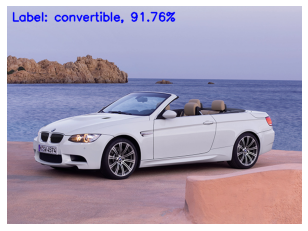

In [9]:
model = predict_image('vgg19', 'bmw.png')

In [10]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Transfer Learning

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow as tf
from tensorflow.keras.datasets import mnist  
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
import  numpy as np


def change_size(image):
    img = array_to_img(image, scale=False) #returns PIL Image
    img = img.resize((75, 75)) #resize image
    img = img.convert(mode='RGB') #makes 3 channels
    arr = img_to_array(img) #convert back to array
    return arr.astype(np.float64)

In [2]:
model = Sequential()

model.add(tf.keras.applications.resnet50.ResNet50(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet'))

model.add(L.Flatten()) #2048
model.add(L.Dense(128, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 25,948,426
Trainable params: 14,450,058
Non-trainable params: 11,498,368
_________________________________________________________________


In [3]:
for layer in model.layers[0].layers:
    if layer.name == 'conv5_block1_0_conv':
        break
    layer.trainable=False

In [11]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1)

Epoch 1/10
938/938 [==============================] - 68s 56ms/step - loss: 0.1340 - accuracy: 0.9610
Epoch 2/10
938/938 [==============================] - 53s 56ms/step - loss: 0.0496 - accuracy: 0.9882
Epoch 3/10
938/938 [==============================] - 53s 56ms/step - loss: 0.0342 - accuracy: 0.9904
Epoch 4/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0166 - accuracy: 0.9954
Epoch 5/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0184 - accuracy: 0.9946
Epoch 6/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0644 - accuracy: 0.9885
Epoch 7/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0127 - accuracy: 0.9962
Epoch 8/10
 28/938 [..............................] - ETA: 50s - loss: 0.0138 - accuracy: 0.9955

KeyboardInterrupt: ignored

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.0366 - accuracy: 0.9915


[0.036590415984392166, 0.9915000200271606]

## Загружаем тренировочные данные


In [6]:
#  60,000 28 x 28 pixel тренировочные изображения и  10,000 28 x 28 pixel тестовые изображения
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [12]:
X_test = np.array(X_test).reshape(-1, 28, 28, 1)
X_test = [change_size(img) for img in X_test]
X_test = np.array(X_test)
X_test.shape

y_test = tf.keras.utils.to_categorical(y_test)

In [9]:


X_train = np.array(X_train[:30000]).reshape(-1, 28, 28, 1)
X_train = [change_size(img) for img in X_train]
X_train = np.array(X_train)
X_train.shape

(30000, 75, 75, 3)

In [10]:
Y_train = tf.keras.utils.to_categorical(y_train)[:30000] # one-hot encoding

AlexNet Pytorch Модель

In [ ]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 1000) -> None:
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x